In [16]:
from platform import python_version
assert '3.12' in python_version()

In [17]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

# Alarm Example

In [18]:
# Step 1: Define the model structure
model = BayesianNetwork([('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'Mary Calls'), ('Alarm', 'John Calls')])

# Step 2: Define the CPTs
# Assuming each variable (B, E, A, M, J) has two states: 0 and 1
# You need to replace the probabilities with your actual probabilities

# CPT for B
cpd_b = TabularCPD(variable='Burglary', variable_card=2, values=[[1 - 0.001], [0.001]])

# CPT for E
cpd_e = TabularCPD(variable='Earthquake', variable_card=2, values=[[1 - 0.002], [0.002]])

# CPT for A given B and E
cpd_a = TabularCPD(variable='Alarm', variable_card=2, 
                   values=[[1 - 0.001, 1 - 0.29, 0.06, 0.05],  # A=0
                           [0.001, 0.29, 0.94, 0.95]], # A=1
                   evidence=['Burglary', 'Earthquake'],
                   evidence_card=[2, 2])

# CPT for M given A
cpd_m = TabularCPD(variable='Mary Calls', variable_card=2, 
                   values=[[1 - 0.01, 0.3],  # M=0
                           [0.01, 0.7]], # M=1
                   evidence=['Alarm'],
                   evidence_card=[2])

# CPT for J given A
cpd_j = TabularCPD(variable='John Calls', variable_card=2, 
                   values=[[0.95, 0.1],  # J=0
                           [0.05, 0.9]], # J=1
                   evidence=['Alarm'],
                   evidence_card=[2])

# Step 3: Add CPTs to the model
model.add_cpds(cpd_b, cpd_e, cpd_a, cpd_m, cpd_j)

# Check the model for correctness
assert model.check_model()
# Now your model is ready to be used for inference

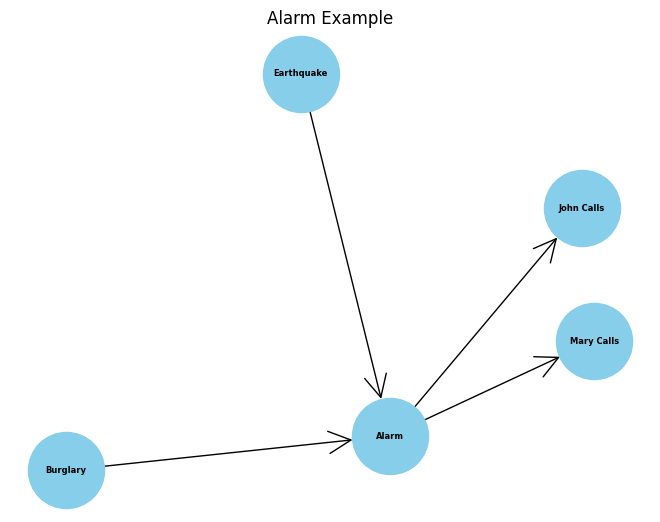

In [19]:
# Step 1: Define the Bayesian Network structure
# Step 2: Extract edges from the Bayesian Network for visualization
edges = model.edges()

# Step 3: Visualize the Network
G = nx.DiGraph()
G.add_edges_from(edges)

pos = nx.shell_layout(G)  # positions for all nodes
pos = nx.spiral_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=6, font_weight="bold", arrowstyle="->", arrowsize=40)
plt.title("Alarm Example")
plt.show()

In [20]:
inference = VariableElimination(model)
# Probability of Alarm=1 given Burglary=1 and Earthquake=1
burglary = inference.query(variables=['Burglary']).values[0]
earthquake = inference.query(variables=['Earthquake']).values[0]
alarm = inference.query(variables=['Alarm'], evidence={'Burglary': 0, 'Earthquake': 0}).values[1]
mary = inference.query(variables=['Mary Calls'], evidence={'Alarm': 1}).values[1]
john = inference.query(variables=['John Calls'], evidence={'Alarm': 1}).values[1]
print('{} * {} * {} * {} * {}'.format(*[burglary, earthquake, alarm, mary, john]))
round(alarm * mary * john * burglary * earthquake, 5)
round(alarm * mary * john * burglary * earthquake, 5) # Got 0.00062 in class

0.999 * 0.998 * 0.001 * 0.7 * 0.9


0.00063

In [21]:
# Step 1: Define the model structure
model = BayesianNetwork([('ExamLevel', 'Marks'), ('IQLevel', 'Marks'), ('Marks', 'Admission'), ('IQLevel', 'APScore')])

# Step 2: Define the CPTs
# Assuming each variable (B, E, A, M, J) has two states: 0 and 1
# You need to replace the probabilities with your actual probabilities

# CPT for B
cpd_b = TabularCPD(variable='ExamLevel', variable_card=2, values=[[0.7], [0.3]])

# CPT for E
cpd_e = TabularCPD(variable='IQLevel', variable_card=2, values=[[0.8], [0.2]])

# CPT for A given B and E
cpd_a = TabularCPD(variable='Marks', variable_card=2, 
                   values=[[0.6, 0.9, 0.5, 0.8],  # A=0
                           [0.4, 0.1, 0.5, 0.2]], # A=1
                   evidence=['IQLevel', 'ExamLevel'],
                   evidence_card=[2, 2])

# CPT for M given A
cpd_m = TabularCPD(variable='Admission', variable_card=2, 
                   values=[[0.6, 0.9],  # M=0
                           [0.4, 0.1]], # M=1
                   evidence=['Marks'],
                   evidence_card=[2])

# CPT for J given A
cpd_j = TabularCPD(variable='APScore', variable_card=2, 
                   values=[[0.75, 0.4],  # J=0
                           [0.25, 0.6]], # J=1
                   evidence=['IQLevel'],
                   evidence_card=[2])

# Step 3: Add CPTs to the model
model.add_cpds(cpd_b, cpd_e, cpd_a, cpd_m, cpd_j)

# Check the model for correctness
assert model.check_model()

# Now your model is ready to be used for inference


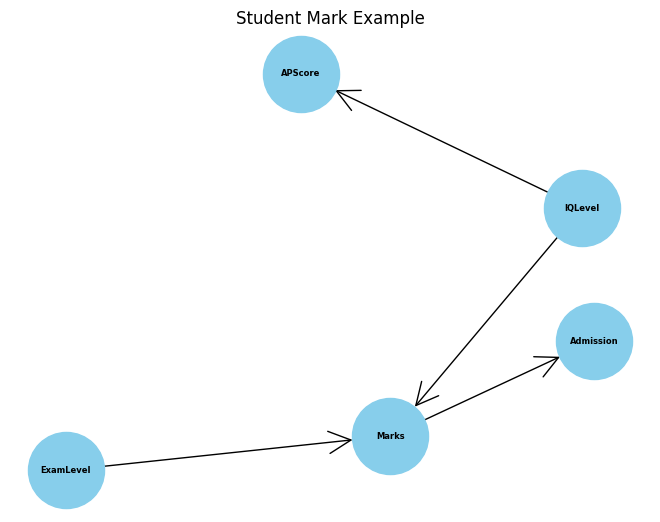

In [22]:
# Step 1: Define the Bayesian Network structure
# Step 2: Extract edges from the Bayesian Network for visualization
edges = model.edges()

# Step 3: Visualize the Network
G = nx.DiGraph()
G.add_edges_from(edges)

pos = nx.shell_layout(G)  # positions for all nodes
pos = nx.spiral_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=6, font_weight="bold", arrowstyle="->", arrowsize=40)
plt.title("Student Mark Example")
plt.show()

In [23]:
inference = VariableElimination(model)
exam = inference.query(variables=['ExamLevel']).values[1]
iq = inference.query(variables=['IQLevel']).values[0]
apScore = inference.query(variables=['APScore'], evidence=dict(IQLevel=0)).values[0]
marks = inference.query(variables=['Marks'], evidence=dict(ExamLevel=1, IQLevel=0)).values[1]
admission = inference.query(variables=['Admission'], evidence=dict(Marks=1)).values[1]
print('{} * {} * {} * {} * {}'.format(*[marks, admission, iq,exam, apScore]))
round(exam * iq * apScore * marks * admission, 5) # Got 0.0018 in class

0.1 * 0.1 * 0.8 * 0.3 * 0.75


0.0018